In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["font.family"] = "Arial"

from scipy.io import savemat, loadmat
from scipy.ndimage import gaussian_filter1d as gf1d
import colorsys

In [2]:
# %matplotlib widget 

## Load data

In [3]:
def RBF(d,lmbda):
    return np.exp(-d**2/2/lmbda**2)

def mldivide(A,B):
    return np.linalg.pinv(A).dot(B)
    
def sm_GP(qq,f,lmbda,sigma):
    d_ij = qq.reshape(len(qq),1) - qq.reshape(1,len(qq))
    
    K = RBF(d_ij,lmbda)
    K_s = K
    K_y = K + np.eye(len(qq))*sigma**2
    
    y = f
    L = np.linalg.cholesky(K_y)

    alpha = mldivide(L.T,mldivide(L,y))
    E = K_s.T@alpha
    
    return E

In [4]:
#### Meshgrid ####
n_grid = 100
x = np.linspace(-1,1,n_grid+1)
y = np.linspace(-1,1,n_grid+1)
z = np.linspace(-1,1,n_grid+1)

r_grid = np.meshgrid(x,y,z) 

# calculate scattering function
box_size = 2
n_grid_scale = 256
scale = n_grid_scale/r_grid[0].shape[0]
dq = 2*np.pi/box_size
qq = np.arange(n_grid_scale/2)*dq

#################################
S_q_Grid = []
p_Grid = []
for i in range(10):
    #### load data ####
    filename = './training_set/alpha/grid/S_q_{}.mat'.format(i)
    data = loadmat(filename)
    k_grid = data['k_grid']
    S_q_kxy = data['S_q_kxy']
    
    S_q_Grid.append(S_q_kxy)
    p_Grid.append(k_grid)

S_q_Grid = np.array(S_q_Grid).reshape(1000,128)[:,1:]
p_Grid = np.array(p_Grid).reshape(1000,3)
S_q_sm_Grid = np.exp(np.array([gf1d(f,1,mode='nearest') for f in np.log(S_q_Grid)]))

k_z = p_Grid[:,0]
alpha = p_Grid[:,1]
kappa = p_Grid[:,2]
set_k_z = np.unique(k_z)
set_alpha = np.unique(alpha)
set_kappa = np.flip(np.unique(kappa))

print('\nk_z in')
print(set_k_z)
print('\nalpha in')
print(set_alpha)
print('\nkappa in')
print(set_kappa)


k_z in
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]

alpha in
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45]

kappa in
[128.    64.    32.    16.     8.     4.     2.     1.     0.5    0.25]


In [5]:
# indexing
def id_params(parameters):
    tol = 1e-6
    id_k_z = np.abs(k_z-parameters[0])<tol
    id_alpha = np.abs(alpha-parameters[1])<tol
    id_kappa = np.abs(kappa-parameters[2])<tol
    return np.where(id_k_z*id_alpha*id_kappa)[0][0]

# color
def color_params(parameters):
    k_z_reduced = (parameters[0]-1)/10
    alpha_reduced = parameters[1]/0.5
    kappa_reduced = np.log(128/parameters[2])/10
    return [k_z_reduced, kappa_reduced, alpha_reduced]

### Plot results: varying k_z

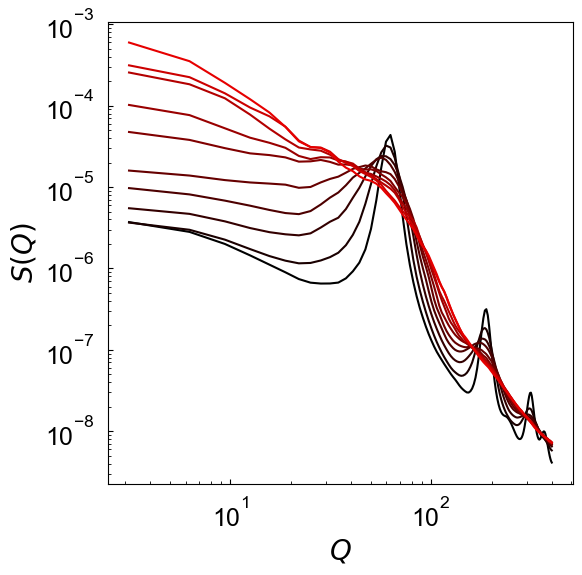

In [6]:
## plot results: varying k_z
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

for i, k_z_i in enumerate(set_k_z):
    parameters = [k_z_i,set_alpha[0],set_kappa[0]]
    index = id_params(parameters)
    
    color = color_params(parameters)

    ax.plot(qq[1:],S_q_sm_Grid[index,],'-',color=color)

ax.set_xlabel(r'$Q$',fontsize=20)
ax.set_ylabel(r'$S(Q)$',fontsize=20)
ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_xlim([0,100])
# ax.set_ylim([1e-6,2e0])
ax.tick_params(direction='in', axis='both', which='both', labelsize=18, pad=10)

plt.show()

### Plot results: varying kappa

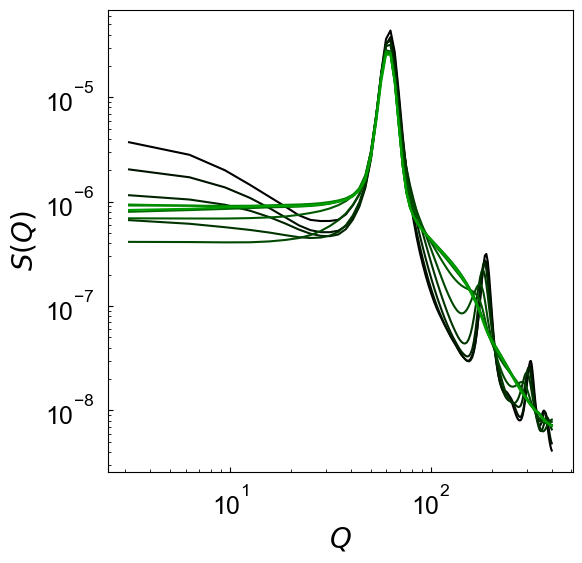

In [7]:
## plot results: varying kappa
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

for i, kappa_i in enumerate(set_kappa):
    parameters = [set_k_z[0],set_alpha[0],kappa_i]
    index = id_params(parameters)
    
    color = color_params(parameters)

    ax.plot(qq[1:],S_q_sm_Grid[index,],'-',color=color)

ax.set_xlabel(r'$Q$',fontsize=20)
ax.set_ylabel(r'$S(Q)$',fontsize=20)
ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_xlim([0,100])
# ax.set_ylim([1e-6,2e0])
ax.tick_params(direction='in', axis='both', which='both', labelsize=18, pad=10)

plt.show()

### Plot results: varying alpha

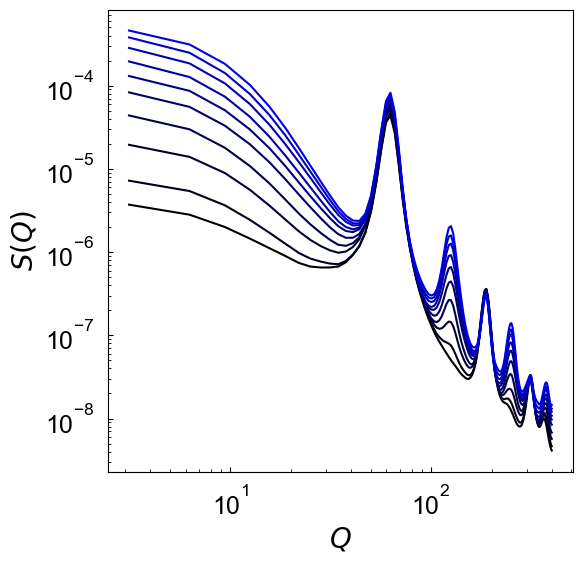

In [8]:
## plot results: varying kappa
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

for i, alpha_i in enumerate(set_alpha):
    parameters = [set_k_z[0],alpha_i,set_kappa[0]]
    index = id_params(parameters)
    
    color = color_params(parameters)

    ax.plot(qq[1:],S_q_sm_Grid[index,],'-',color=color)

ax.set_xlabel(r'$Q$',fontsize=20)
ax.set_ylabel(r'$S(Q)$',fontsize=20)
ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_xlim([0,100])
# ax.set_ylim([1e-6,2e0])
ax.tick_params(direction='in', axis='both', which='both', labelsize=18, pad=10)

plt.show()

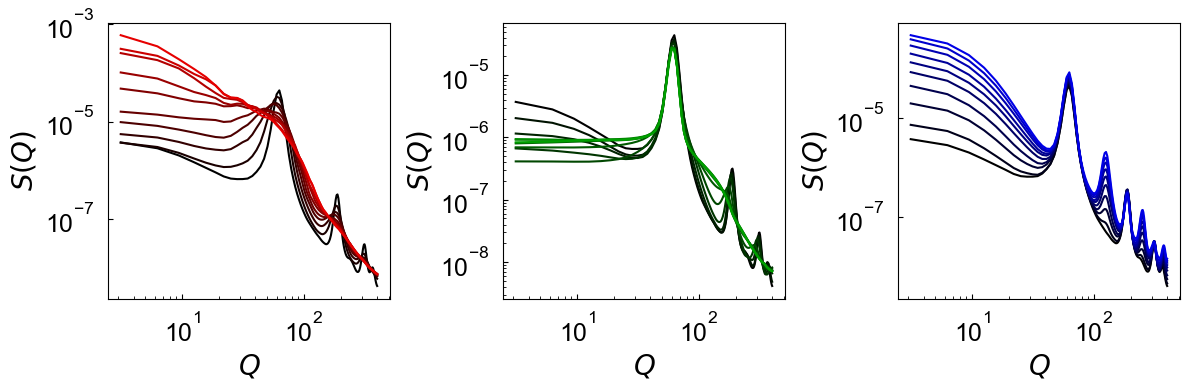

In [30]:
## plot results: varying k_z
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,3,1)

for i, k_z_i in enumerate(set_k_z):
    parameters = [k_z_i,set_alpha[0],set_kappa[0]]
    index = id_params(parameters)
    
    color = color_params(parameters)

    ax.plot(qq[1:],S_q_sm_Grid[index,],'-',color=color)

ax.set_xlabel(r'$Q$',fontsize=20)
ax.set_ylabel(r'$S(Q)$',fontsize=20)
ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_xlim([0,100])
# ax.set_ylim([1e-6,2e0])
ax.tick_params(direction='in', axis='both', which='both', labelsize=18, pad=10)

ax = fig.add_subplot(1,3,2)

for i, kappa_i in enumerate(set_kappa):
    parameters = [set_k_z[0],set_alpha[0],kappa_i]
    index = id_params(parameters)
    
    color = color_params(parameters)

    ax.plot(qq[1:],S_q_sm_Grid[index,],'-',color=color)

ax.set_xlabel(r'$Q$',fontsize=20)
ax.set_ylabel(r'$S(Q)$',fontsize=20)
ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_xlim([0,100])
# ax.set_ylim([1e-6,2e0])
ax.tick_params(direction='in', axis='both', which='both', labelsize=18, pad=10)

ax = fig.add_subplot(1,3,3)

for i, alpha_i in enumerate(set_alpha):
    parameters = [set_k_z[0],alpha_i,set_kappa[0]]
    index = id_params(parameters)
    
    color = color_params(parameters)

    ax.plot(qq[1:],S_q_sm_Grid[index,],'-',color=color)

ax.set_xlabel(r'$Q$',fontsize=20)
ax.set_ylabel(r'$S(Q)$',fontsize=20)
ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_xlim([0,100])
# ax.set_ylim([1e-6,2e0])
ax.tick_params(direction='in', axis='both', which='both', labelsize=18, pad=10)

plt.tight_layout()
plt.show()

## SVD

In [9]:
zscore = lambda X: np.array([(x-np.mean(x))/np.std(x) for x in X])
f_F = lambda x: np.log(x)-np.mean(np.log(x),axis=0) # N by 80

In [10]:
F_sm = (f_F(S_q_sm_Grid))
F = (f_F(S_q_Grid))

In [11]:
U, S, Vh = np.linalg.svd(F_sm)
# sgn = np.sign(Vh[:,60])
FV = F@Vh.T

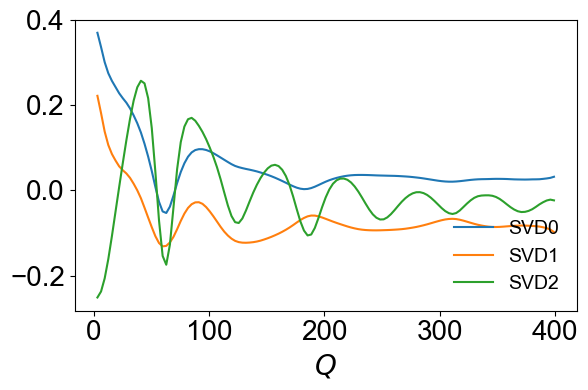

In [12]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.plot(qq[1:],Vh[0], label='SVD0')
ax.plot(qq[1:],Vh[1], label='SVD1')
ax.plot(qq[1:],Vh[2], label='SVD2')

# ax.set_xticks([0,16])
ax.set_xlabel(r'$Q$',fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.legend(fontsize=14,framealpha=0,loc='lower right')

plt.tight_layout()
plt.show()

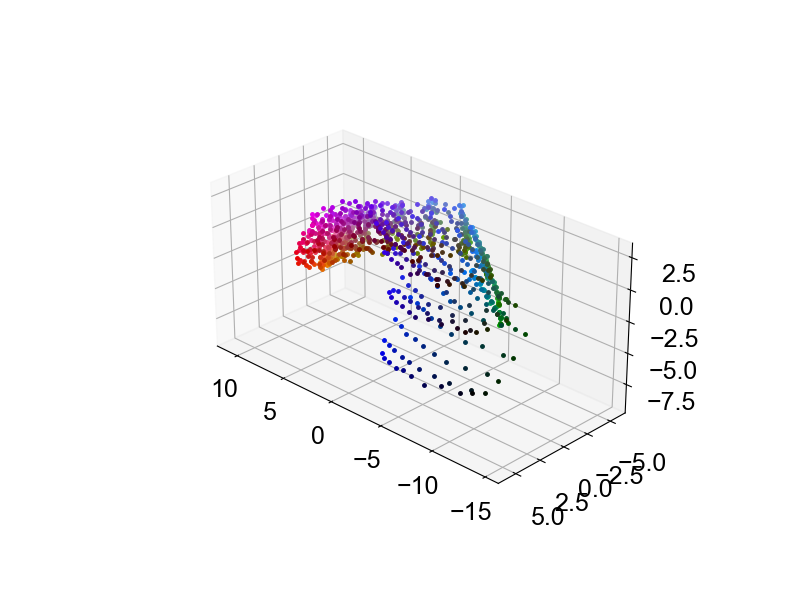

In [13]:
# %matplotlib widget 
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1,projection='3d')

for i, parameters in enumerate(p_Grid):    
    color = color_params(parameters)*np.array([1,1,1])

    ax.plot(FV[i,0],FV[i,1],FV[i,2],'.',ms=5,c=color) 
    ax.set_aspect('equal')

ax.view_init(elev=27, azim=134)

# ax.set_xlabel('SVD0',fontsize=20)
# ax.set_ylabel('SVD1',fontsize=20)
# ax.set_zlabel('SVD2',fontsize=20)
ax.tick_params(direction='in', axis='both', which='both', labelsize=18, pad=10)

# plt.tight_layout()
plt.show()

## GPR

In [14]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF

In [15]:
%matplotlib inline

### LML landscape

In [16]:
X = F_sm
Y_0 = k_z
Y_1 = np.log(kappa)
Y_2 = alpha
Y_0_std = np.std(Y_0)
Y_1_std = np.std(Y_1)
Y_2_std = np.std(Y_2)

kernel = RBF(1) + WhiteKernel(1)
gp_0 = GaussianProcessRegressor(kernel=kernel, alpha=0.0, optimizer=None).fit(X, Y_0)
gp_1 = GaussianProcessRegressor(kernel=kernel, alpha=0.0, optimizer=None).fit(X, Y_1)
gp_2 = GaussianProcessRegressor(kernel=kernel, alpha=0.0, optimizer=None).fit(X, Y_2)

n_LML_grid = 21
lmbda = np.logspace(-0.5, 1.5, n_LML_grid)
sigma = np.logspace(-3, 1, n_LML_grid)
Lmbda_0, Sigma_0 = np.meshgrid(lmbda, sigma)
LML_0 = [[gp_0.log_marginal_likelihood(np.log([Lmbda_0[i, j], Sigma_0[i, j]]))
        for i in range(Lmbda_0.shape[0])]
        for j in range(Lmbda_0.shape[1])]
LML_0 = np.array(LML_0).T
print('LML_0 done')

lmbda = np.logspace(-0.5, 1.5, n_LML_grid)
sigma = np.logspace(-2, 2, n_LML_grid)
Lmbda_1, Sigma_1 = np.meshgrid(lmbda, sigma)
LML_1 = [[gp_1.log_marginal_likelihood(np.log([Lmbda_1[i, j], Sigma_1[i, j]]))
        for i in range(Lmbda_1.shape[0])]
        for j in range(Lmbda_1.shape[1])]
LML_1 = np.array(LML_1).T
print('LML_1 done')

lmbda = np.logspace(0, 2, n_LML_grid)
sigma = np.logspace(-6, -2, n_LML_grid)
Lmbda_2, Sigma_2 = np.meshgrid(lmbda, sigma)
LML_2 = [[gp_2.log_marginal_likelihood(np.log([Lmbda_2[i, j], Sigma_2[i, j]]))
        for i in range(Lmbda_2.shape[0])]
        for j in range(Lmbda_2.shape[1])]
LML_2 = np.array(LML_2).T
print('LML_2 done')

LML_0 done
LML_1 done
LML_2 done


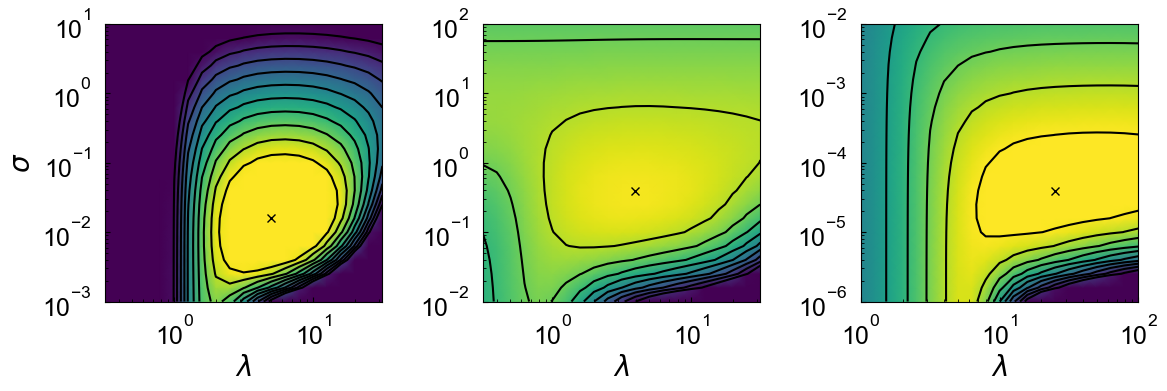

In [25]:
#### plotting
plt.close()
fig = plt.figure(figsize=(12,4))#,dpi=192)

## k_z
ax = fig.add_subplot(1, 3, 1)
ax.set_aspect(0.5)

levels = np.linspace(-2e3,-2e2,10)

index = np.argmax(LML_0)
index_arr_0 = np.unravel_index(index, LML_0.shape)

ax.plot(Lmbda_0[index_arr_0],Sigma_0[index_arr_0], 'xk')

ax.contour(Lmbda_0, Sigma_0, LML_0, levels, colors='k', linestyles='-')
ax.pcolormesh(Lmbda_0, Sigma_0, LML_0, shading='gouraud', vmin = -2e3, vmax = -2e2)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$\lambda$',fontsize=20)
ax.set_ylabel(r'$\sigma$',fontsize=20)
ax.tick_params(direction='in', axis='both', which='both', labelsize=18, pad=10)

## alpha
ax = fig.add_subplot(1, 3, 2)
ax.set_aspect(0.5)

levels = np.linspace(-1e4,-1e3,10)

index = np.argmax(LML_1)
index_arr_1 = np.unravel_index(index, LML_1.shape)

ax.plot(Lmbda_1[index_arr_1],Sigma_1[index_arr_1], 'xk')

ax.contour(Lmbda_1, Sigma_1, LML_1, levels, colors='k', linestyles='-')
ax.pcolormesh(Lmbda_1, Sigma_1, LML_1, shading='gouraud', vmin = -1e4, vmax = -1e3)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$\lambda$',fontsize=20)
# ax.set_ylabel(r'$\sigma$',fontsize=20)
ax.tick_params(direction='in', axis='both', which='both', labelsize=18, pad=10)

plt.tight_layout()

## kappa
ax = fig.add_subplot(1, 3, 3)
ax.set_aspect(0.5)

levels = np.linspace(-3e3,3e3,10)

index = np.argmax(LML_2)
index_arr_2 = np.unravel_index(index, LML_2.shape)

ax.plot(Lmbda_2[index_arr_2],Sigma_2[index_arr_2], 'xk')

ax.contour(Lmbda_2, Sigma_2, LML_2, levels, colors='k', linestyles='-')
ax.pcolormesh(Lmbda_2, Sigma_2, LML_2, shading='gouraud', vmin = -3e3, vmax = 3e3)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$\lambda$',fontsize=20)
# ax.set_ylabel(r'$\sigma$',fontsize=20)
ax.tick_params(direction='in', axis='both', which='both', labelsize=18, pad=10)

plt.tight_layout()

### Train GPR model

In [18]:
kernel_0 = RBF(Lmbda_0[index_arr_0], (1e0, 1e1)) + WhiteKernel(Sigma_0[index_arr_0], (1e-2,1e-1))
gp_opt_0 = GaussianProcessRegressor(kernel=kernel_0, alpha=0.0, n_restarts_optimizer=10)
gp_opt_0.fit(X, Y_0)

kernel_1 = RBF(Lmbda_1[index_arr_1], (1e0, 1e1)) + WhiteKernel(Sigma_1[index_arr_1], (1e-1,1e0))
gp_opt_1 = GaussianProcessRegressor(kernel=kernel_1, alpha=0.0, n_restarts_optimizer=10)
gp_opt_1.fit(X, Y_1)

kernel_2 = RBF(Lmbda_2[index_arr_2], (1e1, 1e2)) + WhiteKernel(Sigma_2[index_arr_1], (1e-5,1e-4))
gp_opt_2 = GaussianProcessRegressor(kernel=kernel_2, alpha=0.0, n_restarts_optimizer=10)
gp_opt_2.fit(X, Y_2)

GaussianProcessRegressor(alpha=0.0,
                         kernel=RBF(length_scale=25.1) + WhiteKernel(noise_level=3.98e-05),
                         n_restarts_optimizer=10)

### Prediction

### load test sets

In [19]:
# X_fit = f_F(S_q_kxy[:,1:])
X_fit = F_sm
Y_pred_0, Y_std_0 = gp_opt_0.predict(X_fit,return_std=True)
Y_pred_1, Y_std_1 = gp_opt_1.predict(X_fit,return_std=True)
Y_pred_2, Y_std_2 = gp_opt_2.predict(X_fit,return_std=True)

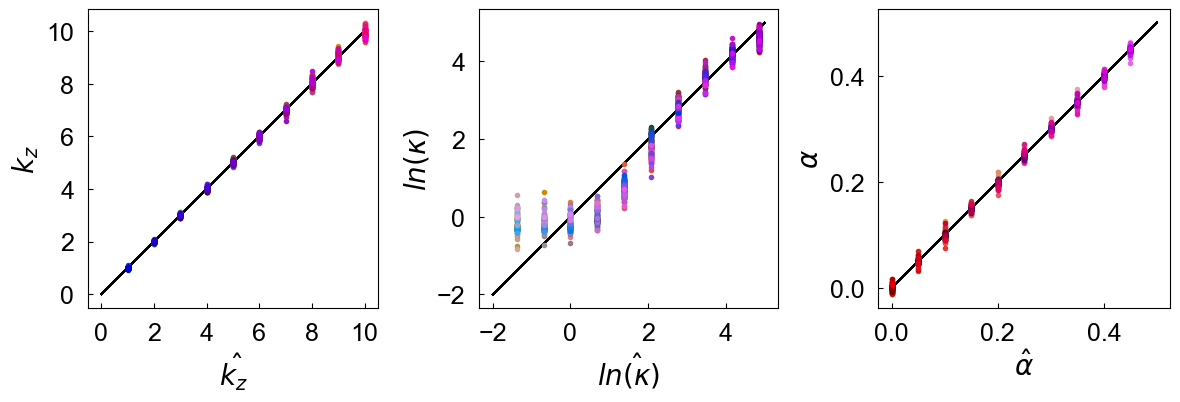

In [27]:
## plot results
plt.close()
fig = plt.figure(figsize=(12,4))

## k_z
ax = fig.add_subplot(1,3,1)
ax.set_aspect(1)
for i in range(len(p_Grid)):
    color = color_params(p_Grid[i])

    ax.plot([0,10],[0,10],'-k',lw=1)
    # ax.errorbar(Y_0[i],Y_pred_0[i],Y_std_0[i],capsize=2,color=color,zorder=2)
    ax.plot(Y_0[i],Y_pred_0[i],'.',color=color,zorder=3)
    

ax.set_xlabel(r'$\hat{k_z}$',fontsize=20)
ax.set_ylabel(r'$k_z$',fontsize=20)
ax.set_xticks([0,2,4,6,8,10])
ax.set_yticks([0,2,4,6,8,10])
ax.tick_params(direction='in', axis='both', which='both', labelsize=18, pad=10)

## kappa
ax = fig.add_subplot(1,3,2)
ax.set_aspect(1)
for i in range(len(p_Grid)):
    color = color_params(p_Grid[i])

    ax.plot([-2,5],[-2,5],'-k',lw=1)
    # ax.errorbar(Y_1[i],Y_pred_1[i],Y_std_1[i],capsize=2,color=color,zorder=2)
    ax.plot(Y_1[i],Y_pred_1[i],'.',color=color,zorder=3)
    

ax.set_xlabel(r'$\hat{ln(\kappa)}$',fontsize=20)
ax.set_ylabel(r'$ln(\kappa)$',fontsize=20)
ax.set_xticks([-2,0,2,4])
ax.set_yticks([-2,0,2,4])
ax.tick_params(direction='in', axis='both', which='both', labelsize=18, pad=10)

## alpha
ax = fig.add_subplot(1,3,3)
ax.set_aspect(1)
for i in range(len(p_Grid)):
    color = color_params(p_Grid[i])

    ax.plot([0,0.5],[0,0.5],'-k',lw=1)
    # ax.errorbar(Y_2[i],Y_pred_2[i],Y_std_2[i],capsize=2,color=color,zorder=2)
    ax.plot(Y_2[i],Y_pred_2[i],'.',color=color,zorder=3)
    

ax.set_xlabel(r'$\hat{\alpha}$',fontsize=20)
ax.set_ylabel(r'$\alpha$',fontsize=20)
ax.tick_params(direction='in', axis='both', which='both', labelsize=18, pad=10)

plt.tight_layout()
